聚类算法
===

# 4.密度聚类方法
密度聚类方法的指导思想是，只要样本点的密度大于某阀值，则将该样本添加到最近的簇中。这类算法能克服基于距离的算法只能发现"类圆形"的聚类的缺点，可发现任意形状的聚类，且对噪声数据不敏感。但计算密度单元的计算复杂度大，需要建立空间索引来降低计算量

## 4.1.DBSCAN算法
Density-Based Spatial Clustering of Applications with Noise.一个比较有代表性的基于密度的聚类算法。与划分和层次聚类方法不同，它将簇定义为密度相连的点的最大集合，能够把具有足够高密度的区域划分为簇，并可在有“噪声” 的数据中发现任意形状的聚类

### 4.1.1.基本概念
- 对象的$\epsilon$-邻域:给定对象在半径$\epsilon$内的区域
- 核心对象:对于给定的数目m，如果一个对象的$\epsilon$-邻域至少包含m个对象，则称该对象为核心对象。
- 直接密度可达:给定一个对象集合D，如果p是在q的$\epsilon$-邻域内，而q是一个核心对象，我们说对象p从对象q出发是直接密度可达的。
- 密度可达:如果存在一个对象链$p_1,p_2,...,p_n,p_1=q,p_n=p$，对$p_i \in D, 1 \leq i \leq n$,$p_{i+1}$是从$p_i$关于$\epsilon$和m直接密度可达的，则对象p是从对象q关于$\epsilon$和m密度可达的。
- 密度相连:如果对象集合D中存在一个对象o，使得对象p和q是从o关于$\epsilon$和m密度可达的，那么对象p和q是关于$\epsilon$和m密度 相连的。
- 簇:一个基于密度的簇是最大的密度相连对象的集合。
- 噪声:不包含在任何簇中的对象称为噪声。

![images](images/09_001.png)

如图$\epsilon$=1cm，m=5，q是一个核心对象，从对象q出发到对象p是直接密度可达的

![images](images/09_002.png)

### 4.1.2.算法流程
- 如果一个点p的$\epsilon$-邻域包含多于m个对象，则创建一个p作为核心对象的新簇;
- 寻找并合并核心对象直接密度可达的对象
- 没有新点可以更新簇时，算法结束

由这个算法可以知道
- 每个簇至少包含一个核心对象;
- 非核心对象可以是簇的一部分，构成了簇的边缘(edge);
- 包含过少对象的簇被认为是噪声

### 4.1.3.DBScan算法实现

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

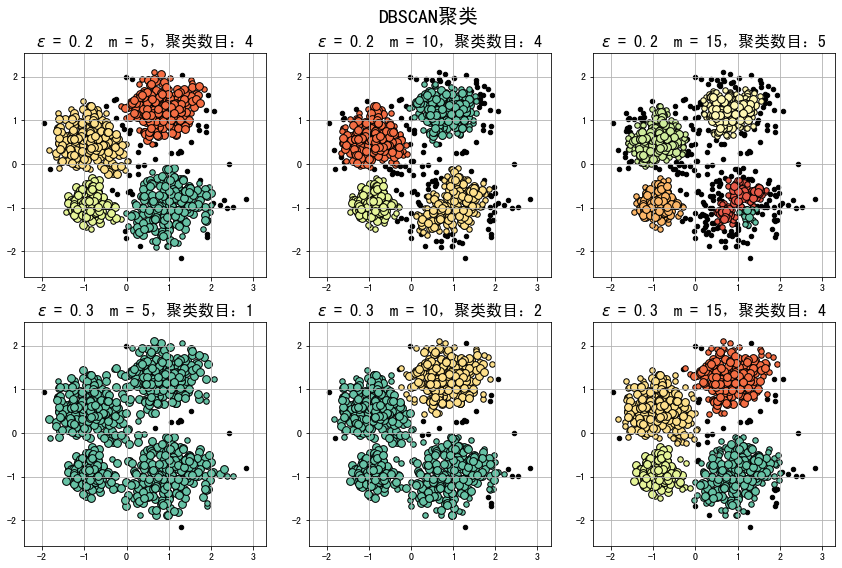

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
data = StandardScaler().fit_transform(data)
# 数据1的参数：(epsilon, min_sample)
params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8), facecolor='w')
plt.suptitle(u'DBSCAN聚类', fontsize=20)

for i in range(6):
    eps, min_samples = params[i]
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data)
    y_hat = model.labels_

    core_indices = np.zeros_like(y_hat, dtype=bool)
    core_indices[model.core_sample_indices_] = True

    y_unique = np.unique(y_hat)
    n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
    # print(y_unique, '聚类簇的个数为：', n_clusters)

    # clrs = []
    # for c in np.linspace(16711680, 255, y_unique.size):
    #     clrs.append('#%06x' % c)
    plt.subplot(2, 3, i+1)
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
    # print(clrs)
    for k, clr in zip(y_unique, clrs):
        cur = (y_hat == k)
        if k == -1:
            plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
            continue
        plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
        plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
    x1_min, x2_min = np.min(data, axis=0)
    x1_max, x2_max = np.max(data, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(True)
    plt.title(u'$\epsilon$ = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

## 4.2.密度最大值算法
密度最大值聚类是一种简洁优美的聚类算法, 可以识别各种形状的类簇, 并且参数很容易确定

### 4.2.1.局部密度
$$\rho_i=\sum_j\chi(d_{ij}-d_c)$$
其中
$$
\chi(x)=\begin{cases}
1 & x < 0\\\\
0 & otherwise
\end{cases}
$$
$d_c$是一个截断距离,$\rho_i$即到对象i的距离小于$d_c$的对象的个数。由于该算法只对$\rho_i$的相对值敏感, 所以对$d_c$的选择是稳健的，一种推荐做法是选择$d_c$，使得平均每个点的邻 居数为所有点的1%-2%。局部密度有三种定义方式
- 截断值：
$$\rho_i=\sum_j\chi(d_{ij}-d_c)$$
其中$\chi(x)=\begin{cases}
1 & x < 0\\\\
0 & otherwise
\end{cases}$
- 高斯核相似度:
$$\rho_i=\sum_{j \in I_S}e^{-(\frac{d_{ij}}{d_c})^2}$$
- K近邻均值:
$$\rho_i=\frac{1}{K}\sum_{i=1}^Kd_{ij}$$
其中$d_{i1}>d_{i2}>...>d_{iK}>d_{i,K+1}>...$

### 4.2.2.高局部密度点距离$\delta_i$
高局部密度点距离$\delta_i=min_{j:\rho_j>\rho_i}(d_{ij})$
- 在密度高于对象i的所有对象中，到对象i最近 的距离，即高局部密度点距离
- 对于密度最大的对象，设置$\delta_i=max(d_{ij})$，即该问题中的无穷大。只有那些密度是局部或者全局最大的点才会有远大于正常值的高局部密度点距离

首先找到一个样本，然后计算$\rho_i$，接着计算其它样本的$\rho$，找到那些$\rho > \rho_i$的样本点，然后计算找到的这些点与初始化样本的距离，然后找到一个这些距离中的最小的那一个距离。比如每个人的财富值是$\rho$，那么我们就是要找到比我财富大的离我最近的那个人。但是这里有个问题，比如马云，他的$\delta$是没有的，因为没有人比他的财富更多，这个就是密度最大的对象

### 4.2.3.簇中心的识别
$\rho$很大，说明这个点周围有好多好多样本。$\delta$很大，说明密度比这个点的那个点，离这个点很远很远.如果$\rho$很小，$\delta$很大，说明这个点是噪声，因为说明这个点离那个比他密度大的点很远，可是它周围的点又很少，那它肯定是噪声
- 那些有着比较大的局部密度$\rho_i$和很大的高密 距离$\delta_i$的点被认为是簇的中心;
- 高密距离$\delta_i$较大但局部密度$\rho_i$较小的点是异常点;
- 确定簇中心之后，其他点按照距离已知簇的中心最近进行分类.也可按照密度可达的方法进行分类

### 4.2.4.决策图Decision Graph
![images](images/09_003.png)

左图是所有点在二维空间的分布, 右图是以$\rho$为横坐标, 以$\delta$为纵坐标绘制的决策图。可以看到，1和10 两个点的$\rho_i$和$\delta_i$都比较大，作为簇的中心点。26、 27、28三个点的$\delta_i$也比较大，但是$\rho_i$较小，所以是异常点，也就是噪声

### 4.2.5.边界和噪声的重认识
- 在聚类分析中，通常需要确定每个点划分给某个簇的可靠性
- 在该算法中，可以首先为每个簇定义一个边界区域 (border region)，亦即划分给该簇但是距离其他簇的点的距离小于$d_c$的点的集合。然后为每个簇找到其边界区域的局部密度最大的点，令其局部密度为$\rho_h$
- 该簇中所有局部密度大于$\rho_h$的点被认为是簇核心的一部分(亦即将该点划分给该类簇的可靠性很大)，其余的点被认为是该类簇的光晕(halo)，亦即可以认为是噪声

## 4.3.MeanShift算法
MeanShift又被称为均值漂移聚类，目的就是找出最密集的区域。同样也是一个迭代过程。在聚类过程中，首先算出初始中心点的偏移均值，将该点移动到此偏移均值，然后以此为新的起始点，继续移动，直到满足最终的条件。Mean Shift 也引入了核函数，用于改善聚类效果。除此之外，Mean Shift 在图像分割，视频跟踪等领域也有较好的应用

5.316611296915807
带宽： 0.1 0.5316611296915806 聚类簇的个数为： 7
带宽： 0.2 1.0633222593831613 聚类簇的个数为： 4
带宽： 0.30000000000000004 1.5949833890747422 聚类簇的个数为： 3
带宽： 0.4 2.1266445187663225 聚类簇的个数为： 1


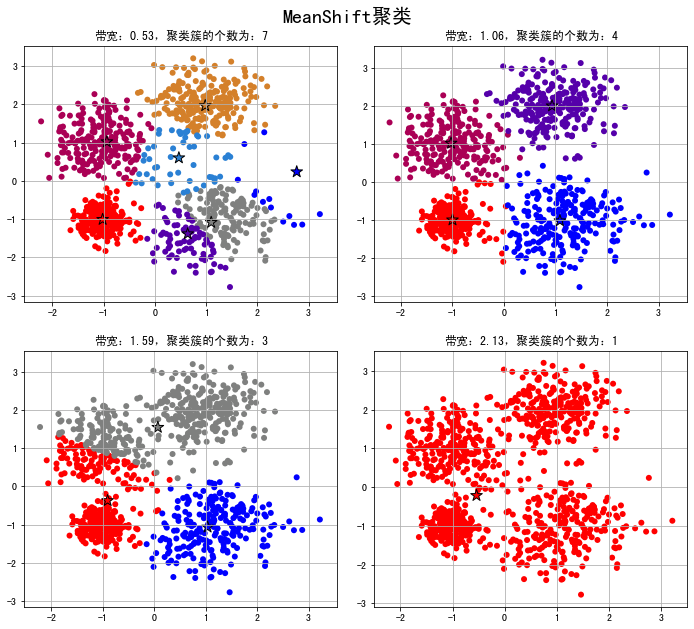

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import MeanShift
from sklearn.metrics import euclidean_distances

N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 9), facecolor='w')
m = euclidean_distances(data, squared=True)
bw = np.median(m)
print(bw)
for i, mul in enumerate(np.linspace(0.1, 0.4, 4)):
    band_width = mul * bw
    model = MeanShift(bin_seeding=True, bandwidth=band_width)
    ms = model.fit(data)
    centers = ms.cluster_centers_
    y_hat = ms.labels_
    n_clusters = np.unique(y_hat).size
    print('带宽：', mul, band_width, '聚类簇的个数为：', n_clusters)

    plt.subplot(2, 2, i+1)
    plt.title(u'带宽：%.2f，聚类簇的个数为：%d' % (band_width, n_clusters))
    clrs = []
    for c in np.linspace(16711680, 255, n_clusters):
        clrs.append("#{:06X}".format(int(c), 2))
    # clrs = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    # print(clrs)
    for k, clr in enumerate(clrs):
        cur = (y_hat == k)
        plt.scatter(data[cur, 0], data[cur, 1], c=clr, edgecolors='none')
    plt.scatter(centers[:, 0], centers[:, 1], s=150, c=clrs, marker='*', edgecolors='k')
    plt.grid(True)
plt.tight_layout(2)
plt.suptitle(u'MeanShift聚类', fontsize=20)
plt.subplots_adjust(top=0.92)

# 5.谱聚类
## 5.1.谱
方阵的谱：方阵作为线性算子，它的所有特征值的全体。
- 方阵的谱半径为最大的特征值
- 矩阵A的谱半径:$A^TA$的最大特征值

谱聚类是一种基于图论的聚类方法，通过对样本数据的拉普拉斯矩阵的特征向量进行聚类，从而达到对样本数据聚类的目的

## 5.2.谱分析的整体过程
1. 给定一组数据$x_1,x_2,...,x_n$，记任意两个点之间的相似度("距离”的减函数)为$s_{ij}=<x_i,x_j>$， 形成相似度图(similarity graph):G=(V,E) 。 如果$x_i$和$x_j$之间的相似度$s_{ij}$大于一定的阈值，那么两个点是连接的，权值记做$s_{ij}$。
2. 接下来，可以用相似度图来解决样本数据的聚类问题:找到图的一个划分，形成若干个组(Group)，使得不同组之间有较低的权值，组内有较高的权值

## 5.3.邻接矩阵
给定一组样本$x_1,x_2,...,x_n$，那么对于样本$x_i,x_j$来度量它们的相似度$\omega_{ij}$，根据高斯相似度，可以得到
$$\omega_{ij}=e^{-\frac{||x_i-x_j||\_2^2}{2\sigma^2}}$$
根据这个公式，我们可以求任意两个样本的高斯相似度，从而得到了一个$n*n$的矩阵，其中对角线为1，其余为$\omega_{ij}$，我们将对角线清零，可以得到邻接矩阵
$$
W=\begin{cases}
0 & i = j\\\\
\omega_{ij} & i \neq j
\end{cases},i,j=1,2,...,n
$$

## 5.4.度与拉普拉斯矩阵
顶点的度$d_i=\sum_{j=1}^n\omega_{ij}$，所以这就是为什么需要将对角线清零。因为对角线清零后，顶点的度就是样本这一行的相似度加和.如果将邻接矩阵的对角线放置上各个顶点的度，其余清零，则得到了度矩阵D，它是一个对称阵，也是对角阵。拉普拉斯矩阵
$$L_{n*n} = D_{n*n} - W_{n*n}$$

## 5.5.谱聚类算法
L是一个$n*n$的矩阵，n是样本个数，拉普拉斯矩阵是一个实数形成的对称矩阵，那么总可以求出它的特征值与特征向量，
使得等式成立
$$L \bullet \overrightarrow{\mu_i}=\lambda_i \bullet \overrightarrow{\mu_i}$$
由于L是一个半正定矩阵，所以特征值$\lambda$最小是0，剩下的都是正数，那么我们就可以有如下描述：
> 假设$\lambda_1,\lambda_2,...,\lambda_n$是拉普拉斯矩阵L的n个特征值，其中$\lambda_1=0$，剩下的$\lambda$是大于0的正数，同样有n个特征向量与之对应$\overrightarrow{\mu_1},\overrightarrow{\mu_2},...,\overrightarrow{\mu_n}$,其中每个$\overrightarrow{\mu_i}$都是一个列向量，那么这n个列向量可以组成一个$n*n$的矩阵，如下：
$$
\begin{bmatrix}
\mu_{11}&\mu_{12}&\dots&\mu_{1k}&\dots&\mu_{1n}\\\\
\mu_{21}&\mu_{22}&\dots&\mu_{2k}&\dots&\mu_{2n}\\\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\\\
\mu_{n1}&\mu_{n2}&\dots&\mu_{nk}&\dots&\mu_{nn}\\\\
\end{bmatrix}
$$
假设我们需要将原始样本分为K个簇，那么我们只保留上述矩阵的前K个列，后面的$n-K$个列舍弃，那么第一行的k个值就是样本1的特征，第二行就是样本2的特征，...,第n行就是第n个样本的特征，然后做K-Means聚类就可以了

## 5.2.谱分析的整体过程
1. 给定一组数据$x_1,x_2,...,x_n$，记任意两个点之间的相似度("距离”的减函数)为$s_{ij}=<x_i,x_j>$， 形成相似度图(similarity graph):G=(V,E) 。 如果$x_i$和$x_j$之间的相似度$s_{ij}$大于一定的阈值，那么两个点是连接的，权值记做$s_{ij}$。
2. 接下来，可以用相似度图来解决样本数据的聚类问题:找到图的一个划分，形成若干个组(Group)，使得不同组之间有较低的权值，组内有较高的权值

开始谱聚类...


谱聚类完成...


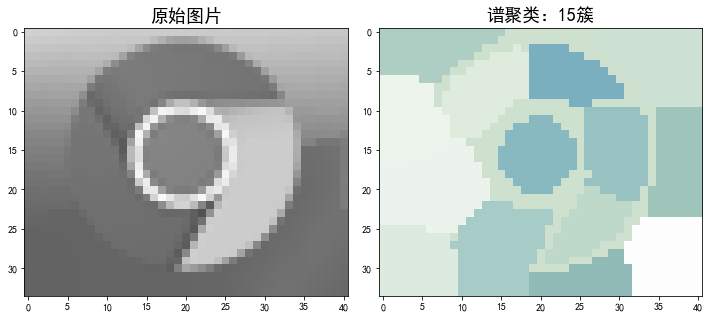

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
from PIL import Image
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

pic = Image.open('data/Chrome.png')
pic = pic.convert('L')
data = np.array(pic).astype(np.float) / 255

plt.figure(figsize=(10, 5), facecolor='w')
plt.subplot(121)
plt.imshow(pic, cmap=plt.cm.gray, interpolation='nearest')
plt.title(u'原始图片', fontsize=18)
n_clusters = 15

affinity = image.img_to_graph(data)
beta = 3
affinity.data = np.exp(-beta * affinity.data / affinity.data.std()) + 10e-5
# a = affinity.toarray()
# b = np.diag(a.diagonal())
# a -= b
print('开始谱聚类...')
y = spectral_clustering(affinity, n_clusters=n_clusters, assign_labels='kmeans', random_state=1)
print('谱聚类完成...')
y = y.reshape(data.shape)
for n in range(n_clusters):
    data[y == n] = n
plt.subplot(122)
clrs = []
for c in np.linspace(16776960, 16711935, n_clusters):
    clrs.append('#%06d' % c)
cm = matplotlib.colors.ListedColormap(clrs)
plt.imshow(data, cmap=cm, interpolation='nearest')
plt.title(u'谱聚类：%d簇' % n_clusters, fontsize=18)
plt.tight_layout()

# 6.AP聚类
AP(Affinity Propagation)算法是一种基于近邻传播的半监督聚类算法。

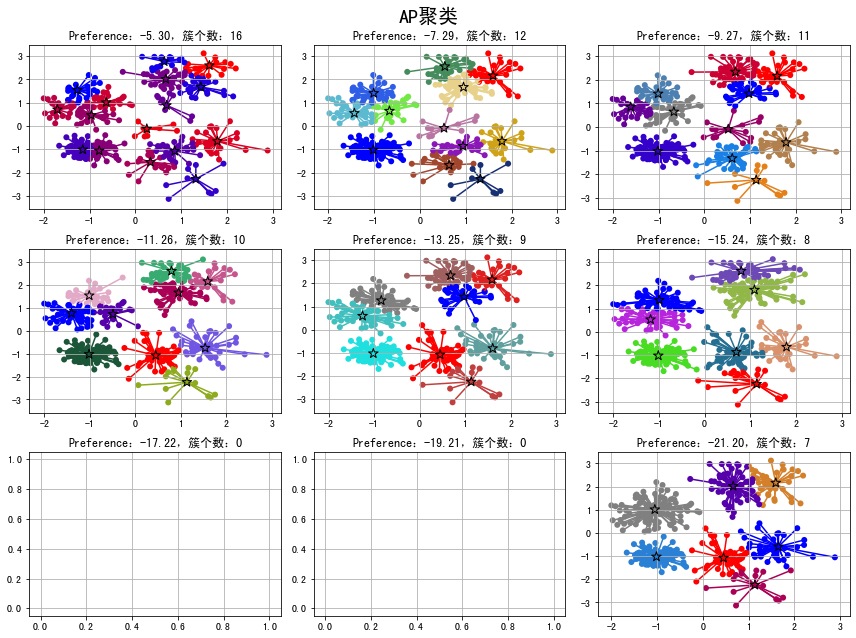

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import euclidean_distances

N = 400
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
m = euclidean_distances(data, squared=True)
preference = -np.median(m)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 9), facecolor='w')
for i, mul in enumerate(np.linspace(1, 4, 9)):
    p = mul * preference
    model = AffinityPropagation(affinity='euclidean', preference=p)
    af = model.fit(data)
    center_indices = af.cluster_centers_indices_
    n_clusters = len(center_indices)
    y_hat = af.labels_

    plt.subplot(3, 3, i+1)
    plt.title(u'Preference：%.2f，簇个数：%d' % (p, n_clusters))
    clrs = []
    for c in np.linspace(16711680, 255, n_clusters):
        clrs.append("#{:06X}".format(int(c), 2))
    # clrs = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    for k, clr in enumerate(clrs):
        cur = (y_hat == k)
        plt.scatter(data[cur, 0], data[cur, 1], c=clr, edgecolors='none')
        center = data[center_indices[k]]
        for x in data[cur]:
            plt.plot([x[0], center[0]], [x[1], center[1]], color=clr, zorder=1)
    plt.scatter(data[center_indices, 0], data[center_indices, 1], s=100, c=clrs, marker='*', edgecolors='k', zorder=2)
    plt.grid(True)
plt.tight_layout()
plt.suptitle(u'AP聚类', fontsize=20)
plt.subplots_adjust(top=0.92)